### Problem 3 - FourPeak

In [1]:
import mlrose
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

fitness = mlrose.FourPeaks(t_pct=0.15)

problem_fit = mlrose.DiscreteOpt(length=70, fitness_fn=fitness)

/home/kellgon/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Genetic

In [9]:
# define the parameter values that should be searched
pop_size=400
max_attempts = 2000

mutation_prob= 0.1

best_state, best_fitness, genetic_fitness_curve = mlrose.genetic_alg(problem_fit, mutation_prob = mutation_prob, pop_size=pop_size,
                                              max_attempts = max_attempts, random_state = 3, curve=True)
print("Mutation = ", mutation_prob)
print(best_state)
print(best_fitness)

Mutation =  0.1
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
91.0


# Random Hill

In [3]:
# Solve problem using the random hill climb
max_attempts = 1000
best_state, best_fitness, random_fitness_curve = mlrose.random_hill_climb(problem_fit,
                                              max_attempts = max_attempts, random_state = 3, curve=True)

print(best_state)
print(best_fitness)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
70.0


# Simulated Annealing

In [4]:
# Solve problem using simulated annealing

# Define decay schedule
schedule = mlrose.GeomDecay()
max_attempts=1000

best_state, best_fitness, annealing_fitness_curve = mlrose.simulated_annealing(problem_fit, schedule=schedule,
                                              max_attempts = max_attempts, random_state = 3, curve=True)

print("Simulated annealing with GeomDecay")
print(best_state)
print(best_fitness)



/home/kellgon/.local/lib/python3.6/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Simulated annealing with GeomDecay
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
70.0


# MIMIC

In [6]:
# Solve problem using mimic
pop_size=400 #(300 was 71 and 100 was 74)
max_attempts=100
keep_pct=0.1 

best_state, best_fitness, mimic_fitness_curve = mlrose.mimic(problem_fit, pop_size=pop_size, keep_pct=keep_pct,
                                              max_attempts = max_attempts, random_state = 3, curve=True)
print("MIMIC with Keep_PCT of ", keep_pct)
print(best_state)
print(best_fitness)

MIMIC with Keep_PCT of  0.1
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
90.0


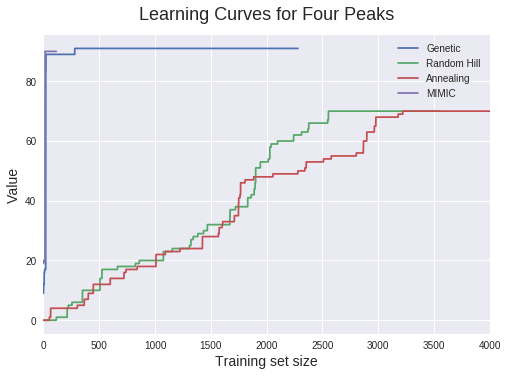

In [10]:
plt.style.use('seaborn')
plt.plot(genetic_fitness_curve, label='Genetic')
plt.plot(random_fitness_curve, label='Random Hill')
plt.plot(annealing_fitness_curve, label='Annealing')
plt.plot(mimic_fitness_curve, label='MIMIC')

plt.xlim(0,4000)

plt.ylabel('Value', fontsize=14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning Curves for Four Peaks', fontsize=18, y=1.03)
plt.legend()